In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.patches import Rectangle

In [3]:
pathToFileInDisk = r'5.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

picture is 1920-by-1080


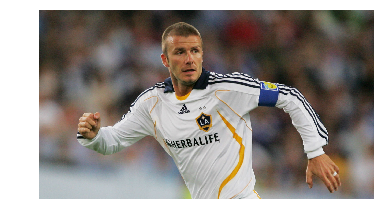

In [4]:
picture = Image.open(BytesIO(data))

# Display the thumbnail.
plt.imshow(picture)
plt.axis("off")

# Verify the thumbnail size.
print("picture is {0}-by-{1}".format(*picture.size))

## Evaluate whether adult/racy image

In [5]:
# Variables
_region = 'westus' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/Evaluate'.format(_region)
_key = 'c1d600d887e34636bf26a9b18f3dc52b' #Here you have to paste your primary key
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'image/jpeg'
json=None
response = requests.request( 'post', _url, data = data, headers = headers)

In [7]:
response.json()

{'AdultClassificationScore': 0.005057428032159805,
 'IsImageAdultClassified': False,
 'RacyClassificationScore': 0.010796607472002506,
 'IsImageRacyClassified': False,
 'AdvancedInfo': [],
 'Result': False,
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_740918db-861b-4f51-8df4-3f8e6cd502fc'}

## Find faces in an image

In [21]:
# Variables
_region = 'westus' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/FindFaces'.format(_region)
_key = 'c1d600d887e34636bf26a9b18f3dc52b' #Here you have to paste your primary key
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'image/jpeg'
json=None
response = requests.request( 'post', _url, data = data, headers = headers)

In [22]:
response.json()

{'Faces': [{'Left': 774, 'Right': 953, 'Top': 198, 'Bottom': 377}],
 'Count': 1,
 'AdvancedInfo': [],
 'Result': True,
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_c14139f3-7e03-469f-933f-24f41ccec815'}

In [10]:
result=response.json()

picture is 1920-by-1080


(-0.5, 1919.5, 1079.5, -0.5)

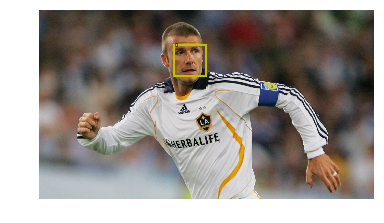

In [11]:
ax=plt.imshow(picture)
# Verify the thumbnail size.
print("picture is {0}-by-{1}".format(*picture.size))

if result['Count']:
    for i in range(result['Count']):
        origin=(result['Faces'][i]['Left'],result['Faces'][i]['Top'])
        width=result['Faces'][i]['Right']-result['Faces'][i]['Left']
        height=result['Faces'][i]['Bottom']-result['Faces'][i]['Top']
        patch  = Rectangle(origin, width, height, fill=False, linewidth=2, color='y')
        ax.axes.add_patch(patch)
        text=str(i)
        plt.text(origin[0], origin[1], text, fontsize=5, color= 'black',va="center")
else:
    print('no face detected')
plt.axis("off")

In [12]:
# Evaluate whether image are matched

In [130]:
# Variables
_region = 'westus' #Here you enter the region of your subscription
_key = 'c1d600d887e34636bf26a9b18f3dc52b' #Here you have to paste your primary key

In [131]:
# create image list

In [132]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
body={
  "Name": 'ImageList0'
}
params={}

In [133]:
response = requests.request( 'post', _url, params=params, headers = headers, json=body)
response.json()

{'Id': 401608, 'Name': 'ImageList0', 'Description': None, 'Metadata': {}}

In [134]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
body={
  "Name": 'ImageList1'
}
params={}

In [135]:
response = requests.request( 'post', _url, params=params, headers = headers, json=body)
response.json()

{'Id': 401609, 'Name': 'ImageList1', 'Description': None, 'Metadata': {}}

In [107]:
# get all created imagelist

In [204]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
response = requests.request( 'get', _url, headers = headers)
response.json()

[{'Id': 401608, 'Name': 'ImageList0', 'Description': None, 'Metadata': {}}]

In [102]:
# delete unneccessary imagelist

In [137]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}'.format(_region,401609)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params={}
response = requests.request( 'DELETE', _url, headers = headers, params=params)

In [138]:
# add image to Imagelist

In [256]:
body={
  "DataRepresentation":"URL",
  "Value":"https://moderatorsampleimages.blob.core.windows.net/samples/img_300.jpg"
}

In [257]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}/images'.format(_region,401608)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params={}
response = requests.request( 'post', _url, headers = headers, params=params,json=body)

In [258]:
response.json()

{'Message': 'Error',
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_10f0b234-de59-4f2a-aed4-c9567f406481',
 'Errors': [{'Title': 'Image Exists.',
   'Message': 'Image already exists. ImageId: 419229'}]}

In [262]:
body={
  "DataRepresentation":"URL",
  "Value":"https://cdn.images.express.co.uk/img/dynamic/67/590x/400132_1.jpg"
}

In [263]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}/images'.format(_region,401608)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params={}
response = requests.request( 'post', _url, headers = headers, params=params,json=body)

In [264]:
response.json()

{'ContentId': '419240',
 'AdditionalInfo': [{'Key': 'Source', 'Value': '401608'},
  {'Key': 'ImageDownloadTimeInMs', 'Value': '521'},
  {'Key': 'ImageSizeInBytes', 'Value': '26342'}],
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_3128ca22-4f8e-42e3-b714-324d986fcbd7'}

In [201]:
# get images ID

In [322]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}/images'.format(_region,401608)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
response = requests.request( 'get', _url, headers = headers)
response.json()

{'ContentSource': '401608',
 'ContentIds': [419229, 419240],
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_7d1db770-365f-470b-acaf-f99131103b42'}

In [199]:
# delete images

In [211]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}/images'.format(_region,401608)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params={}
response = requests.request( 'DELETE', _url, headers = headers, params=params)

In [313]:
# refresh image index

In [314]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/lists/v1.0/imagelists/{}/RefreshIndex'.format(_region,401608)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params={}
response = requests.request( 'post', _url, headers = headers, params=params)

In [315]:
response.json()

{'ContentSourceId': '401608',
 'IsUpdateSuccess': True,
 'AdvancedInfo': [],
 'Status': {'Code': 3000,
  'Description': 'RefreshIndex successfully completed.',
  'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_7d14cfa1-11f7-4eff-a693-34e6132696b9'}

In [316]:
# evaluate images are matched

In [354]:
pathToFileInDisk = r'5.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

picture is 1920-by-1080


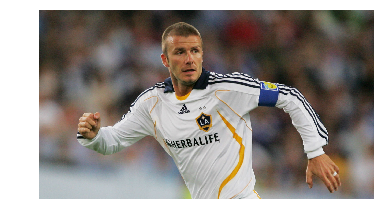

In [355]:
picture = Image.open(BytesIO(data))

# Display the thumbnail.
plt.imshow(picture)
plt.axis("off")

# Verify the thumbnail size.
print("picture is {0}-by-{1}".format(*picture.size))

In [345]:
pathToFileInDisk = r'7.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

picture is 224-by-224


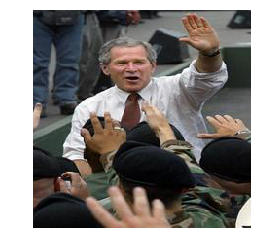

In [346]:
picture = Image.open(BytesIO(data))

# Display the thumbnail.
plt.imshow(picture)
plt.axis("off")

# Verify the thumbnail size.
print("picture is {0}-by-{1}".format(*picture.size))

In [347]:
body={
  "DataRepresentation":"URL",
  "Value":"https://moderatorsampleimages.blob.core.windows.net/samples/img_300.jpg"
}

In [350]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/Match'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json'
params={'listID':401608}
response = requests.request( 'post', _url, headers = headers, params=params,json=body)

In [351]:
response.json()

{'IsMatch': True,
 'Matches': [{'Score': 1.0,
   'MatchId': 419229,
   'Source': '401608',
   'Tags': [],
   'Label': None}],
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_c22b3095-a545-4fee-a1f1-ad60d95cf166'}

In [356]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/Match'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'image/jpeg'
params={'listID':401608}
response = requests.request( 'post', _url, headers = headers, params=params,data=data)

In [357]:
response.json()

{'IsMatch': False,
 'Matches': [],
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'WU_ibiza_89fadc32-e261-4b3e-b890-7e9e33dae0f5_ContentModerator.F0_b88809b0-6662-448a-b599-3d40cff08926'}

In [343]:
## OCR

In [358]:
body={
  "DataRepresentation":"URL",
  "Value":"https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/" + \
    "Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"
}

In [362]:
_url='https://{}.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/OCR'.format(_region)
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json'
params={'language':'eng'}
response = requests.request( 'post', _url, headers = headers, params=params,json=body)

In [369]:
print (response.json()['Text'])

NOTHING 
EXISTS 
EXCEPT 
ATOMS 
AND EMPTY 
SPACE. 
Everything else 
is opinion. 

